In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import glob
import os

In [10]:
files = glob.glob("data/d*.csv")

df_list = []
for i in files:
    csv = pd.read_csv(i)
    df_list.append(csv)

In [11]:
aic_list = []
def arma_aic_df(data, n):
    aic = np.zeros((n,n))

    for i in range(n):
        for j in range(n):
            aic[i][j] = (ARIMA(data, order=(j,0,i), trend='n').fit().aic)/data.size
    
    aic = pd.DataFrame(aic)
    return aic

for i in range(2): aic_list.append(arma_aic_df(df_list[i], 6))

c:\Users\Joseph\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Joseph\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Joseph\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Joseph\miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Joseph\miniconda3\lib\site-packages\statsmodels\tsa\state

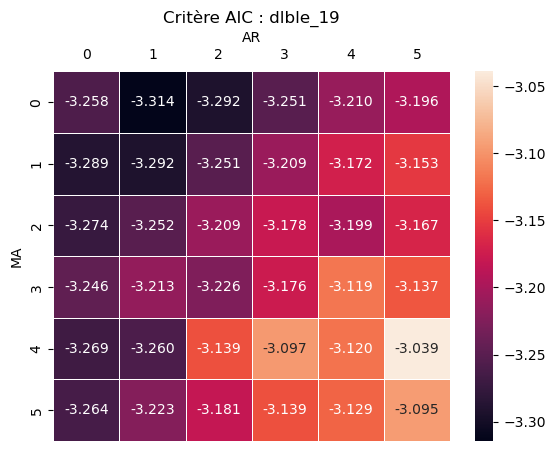

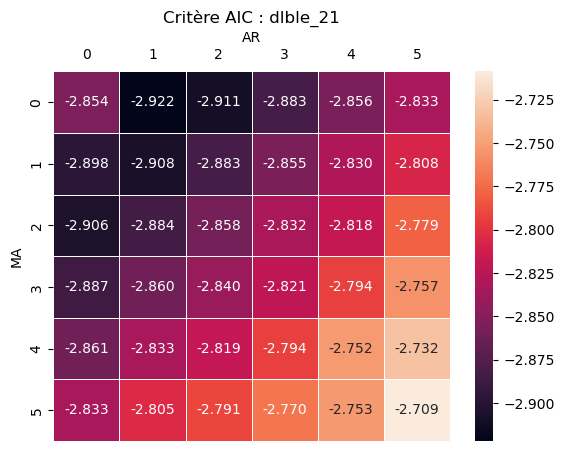

In [12]:
def heatmap(data, name):
    fig, ax = plt.subplots()
    ax = sns.heatmap(data, annot=True, fmt=".3f",linewidth=.5)
    ax.set(xlabel="AR", ylabel="MA", title=f"Critère AIC : {name}")
    ax.xaxis.set_label_position('top') 
    ax.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.show()

for i in range(2): heatmap(aic_list[i], df_list[i].columns[0])

In [13]:
print(ARIMA(df_list[0], order=(1,0,0), trend='n', enforce_invertibility=False).fit(method='innovations_mle').summary())

                               SARIMAX Results                                
Dep. Variable:               dlble_19   No. Observations:                   47
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  79.888
Date:                Sat, 18 Feb 2023   AIC                           -155.777
Time:                        10:48:03   BIC                           -152.077
Sample:                             0   HQIC                          -154.384
                                 - 47                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3218      0.154     -2.084      0.037      -0.624      -0.019
sigma2         0.0020      0.000      5.158      0.000       0.001       0.003
Ljung-Box (L1) (Q):                   0.19   Jarque-

In [14]:
print(ARIMA(df_list[1], order=(1,0,0), trend='n', enforce_invertibility=False).fit(method='innovations_mle').summary())

                               SARIMAX Results                                
Dep. Variable:               dlble_21   No. Observations:                   71
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 105.728
Date:                Sat, 18 Feb 2023   AIC                           -207.456
Time:                        10:48:04   BIC                           -202.931
Sample:                             0   HQIC                          -205.657
                                 - 71                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3082      0.081     -3.822      0.000      -0.466      -0.150
sigma2         0.0030      0.001      5.880      0.000       0.002       0.004
Ljung-Box (L1) (Q):                   0.01   Jarque-